In [32]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader,TensorDataset
import  torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from os import listdir
from os.path import isfile, join
# import data_proses
import argparse
import yaml

import sys
sys.path.insert(0, r'C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code')
from data import data_proses
import utils
# import new_code.data.data_proses as data_proses


with open(r'C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\config.yaml', 'r') as f:
    args = yaml.safe_load(f)

config = argparse.Namespace(**args)


data = pd.read_csv(r'C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data\02_Aug_2023_11_46_clean.csv')

C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data_proses.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[['M1x','M2x','M3x','M4x']]  = labels[['M1x','M2x','M3x','M4x']].sub(labels['M1x'], axis=0)
C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\data\data_proses.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[['M1y','M2y','M3y','M4y']] = labels[['M1y','M2y','M3y','M4y']].sub(labels['M1y'], axis=0)
C:\Users\rotem\OneDrive\Desktop\main\roboticstau\new_code\d

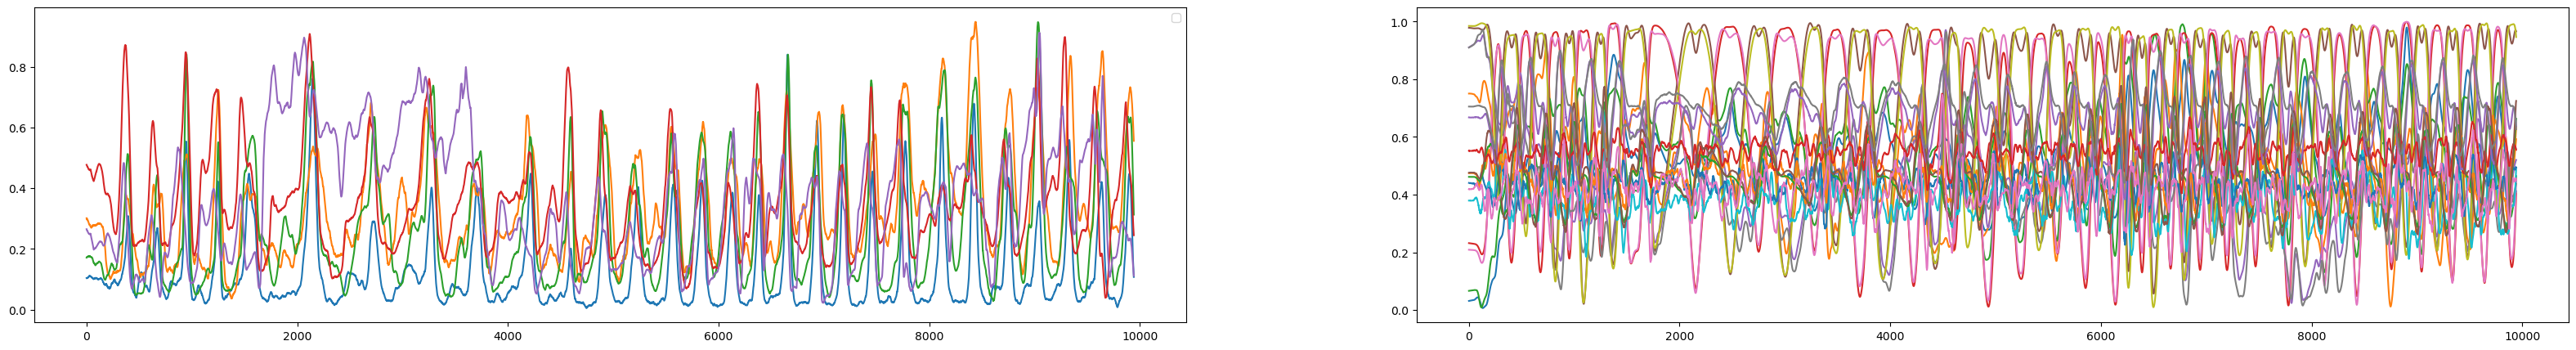

In [33]:
# load data 
# data = data_proses.data_loder(config=config)
data = data[config.fmg_index+config.first_positoin_label_inedx+config.sesion_time_stamp].dropna().reset_index(drop=True)


# drop bad data 
data = data_proses.mask(data,config)

# separate
# fmg_df, _, label_df = data_proses.sepatare_data(data,config=config,first=True)



# find zero axis 
data[config.positoin_label_inedx] = data_proses.get_label_axis(data[config.first_positoin_label_inedx],config=config)
# add velocity 
data[config.velocity_label_inedx] = data_proses.calc_velocity(config,data[config.first_positoin_label_inedx])

# subtract bias 
data[config.fmg_index] = data_proses.subtract_bias(data[config.fmg_index+config.sesion_time_stamp])



# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(40,5))

# ax1.plot(fmg_df[5000:8000])

# ax2.plot(label_df[5000:8000])
# ax1.legend()

# plt.show() 


## normalization 





# TODO: add here agmuntations 



config.fmg_index =data[config.fmg_index].loc[:,data[config.fmg_index].var(axis=0)>400].columns

config.input_size = len(config.fmg_index)



#normalize 
data[config.positoin_label_inedx+config.velocity_label_inedx],label_max_val,label_min_val = utils.min_max_normalize(data[config.positoin_label_inedx+config.velocity_label_inedx])
data[config.fmg_index],fmg_max_val,fmg_min_val = utils.min_max_normalize(data[config.fmg_index])


# fmg_df = fmg_df.fillna(0)
#avereg rolling window
data[config.fmg_index] = utils.rollig_window(config=config, data=data[config.fmg_index])
data[config.positoin_label_inedx+config.velocity_label_inedx] = data[config.positoin_label_inedx+config.velocity_label_inedx].rolling(window=config.window_size, axis=0).mean()



data = data.drop_duplicates().dropna().reset_index(drop=True)
fmg_df = data[config.fmg_index]
label_df = data[config.positoin_label_inedx+config.velocity_label_inedx]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(40,5))

ax1.plot(fmg_df)

ax2.plot(label_df)
ax1.legend()

plt.pause(0.001) 

In [11]:
featurs = df[config.fmg_index]

In [ ]:
featurs

In [15]:
targets = df[config.first_positoin_label_inedx]
targets

,M1x,M1y,M1z,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z
0,-0.996029,0.637570,-0.162449,-1.165711,0.444267,-0.002644,-1.035941,0.639871,0.351186,-0.949573,0.595297,0.148495
1,-0.996025,0.637564,-0.162444,-1.165709,0.444268,-0.002627,-1.035923,0.640024,0.351187,-0.949682,0.595317,0.148512
2,-0.996025,0.637564,-0.162444,-1.165709,0.444268,-0.002627,-1.035923,0.640024,0.351187,-0.949682,0.595317,0.148512
3,-0.996022,0.637555,-0.162441,-1.165699,0.444269,-0.002610,-1.035958,0.640185,0.351439,-0.949748,0.595351,0.148516
4,-0.996022,0.637555,-0.162441,-1.165699,0.444269,-0.002610,-1.035958,0.640185,0.351439,-0.949748,0.595351,0.148516
...,...,...,...,...,...,...,...,...,...,...,...,...
9978,-0.967838,0.628113,-0.176678,-1.084092,0.430447,0.029243,-0.676854,0.560988,0.266750,-0.751880,0.544860,0.061399
9979,-0.968185,0.628454,-0.176600,-1.083843,0.430472,0.029669,-0.667472,0.559992,0.260276,-0.748152,0.544719,0.056930
9980,-0.968474,0.628719,-0.176462,-1.083539,0.430476,0.030116,-0.658048,0.559245,0.253694,-0.744623,0.544398,0.052567
9981,-0.968763,0.628947,-0.176225,-1.083202,0.430363,0.030523,-0.648894,0.558111,0.246816,-0.741194,0.544067,0.048335


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = featurs
y = targets

selector = SelectKBest(f_regression, k=10)
X_new = selector.fit_transform(X, y)

ValueError: Input y contains NaN.

6

In [ ]:
df[config.first_positoin_label_inedx]

,M1x,M1y,M1z,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z
0,0.0,0.637570,-0.162449,-0.169682,0.444267,-0.002644,-0.039912,0.639871,0.351186,0.046456,0.595297,0.148495
1,0.0,0.637564,-0.162444,-0.169684,0.444268,-0.002627,-0.039898,0.640024,0.351187,0.046343,0.595317,0.148512
2,0.0,0.637564,-0.162444,-0.169684,0.444268,-0.002627,-0.039898,0.640024,0.351187,0.046343,0.595317,0.148512
3,0.0,0.637555,-0.162441,-0.169677,0.444269,-0.002610,-0.039936,0.640185,0.351439,0.046274,0.595351,0.148516
4,0.0,0.637555,-0.162441,-0.169677,0.444269,-0.002610,-0.039936,0.640185,0.351439,0.046274,0.595351,0.148516
...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0.0,0.628113,-0.176678,-0.116253,0.430447,0.029243,0.290984,0.560988,0.266750,0.215959,0.544860,0.061399
9979,0.0,0.628454,-0.176600,-0.115658,0.430472,0.029669,0.300713,0.559992,0.260276,0.220033,0.544719,0.056930
9980,0.0,0.628719,-0.176462,-0.115064,0.430476,0.030116,0.310426,0.559245,0.253694,0.223851,0.544398,0.052567
9981,0.0,0.628947,-0.176225,-0.114439,0.430363,0.030523,0.319869,0.558111,0.246816,0.227569,0.544067,0.048335


True